<a href="https://colab.research.google.com/github/JUCSERahull337/DiabeticRetinopathy/blob/master/finalProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
import numpy as np
import pandas as pd
import shutil
import sys
import os
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.utils import load_img,img_to_array
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.preprocessing import image
from keras.applications import VGG16
from keras.optimizers import Adam
import keras.backend as K
from sklearn.model_selection import train_test_split


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Final_Project_DR/Dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Final_Project_DR/Dataset/test.csv')
print(train_df.shape)
print(test_df.shape)
test_df.head()
#train_df.head()

(3662, 2)
(1928, 1)


,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [ ]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
num_train = train_df.shape[0]
train_df.shape
num_test = test_df.shape[0]
test_df.shape

(1928, 1)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Loading Image dataset

In [ ]:
train_images =  "/content/drive/MyDrive/Final_Project_DR/Dataset/train_images/"

<function matplotlib.pyplot.show(close=None, block=None)>

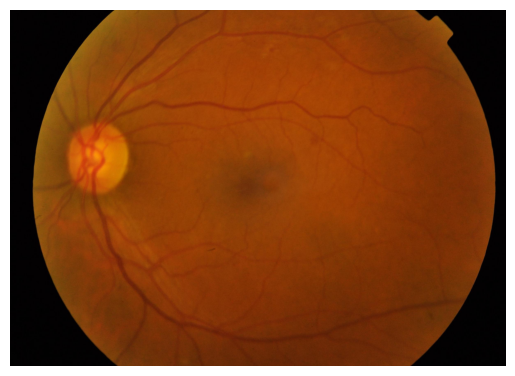

In [ ]:
img = load_img(train_images +  train_df['id_code'].iloc[9] +".png")
plt.imshow(img)
plt.axis("off")
plt.show

<Axes: >

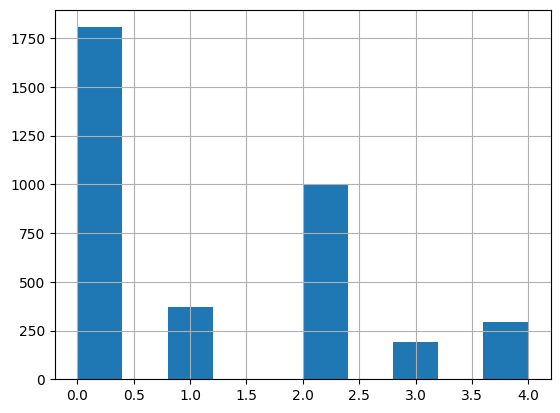

In [ ]:
X = train_df['id_code']
y = train_df['diagnosis']


y.hist()

In [ ]:
num_classes = 5

In [ ]:
y = to_categorical(y, num_classes=num_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
vgg = VGG16()

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_layers_list=vgg.layers

In [ ]:
model=Sequential()

In [ ]:
for i in range(len(vgg_layers_list)-1):
    model.add(vgg_layers_list[i])

In [ ]:
for layers in model.layers:
    layers.trainable = False
model.add(Dense(num_classes, activation="softmax"))
num_classes

5

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:
diagnosis = [0,1,2,3,4]

In [ ]:
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)
train_df['diagnosis'] = train_df['diagnosis'].astype('str')
def append_ext(fn):
    return fn+".png"

train_df["id_code"]=train_df["id_code"].apply(append_ext)
test_df["id_code"]=test_df["id_code"].apply(append_ext)

In [ ]:
train_generator=datagen.flow_from_dataframe(
    dataframe=train_df[:2929],
    directory= "/content/drive/MyDrive/Final_Project_DR/Dataset/train_images/",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(224,224))

Found 2929 validated image filenames belonging to 5 classes.


In [ ]:
test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
directory="/content/drive/MyDrive/Final_Project_DR/Dataset/test_images/",
x_col="id_code",
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(224,224))

Found 1928 validated image filenames.


In [ ]:
valid_generator=datagen.flow_from_dataframe(
dataframe=train_df[2929:],
directory="/content/drive/MyDrive/Final_Project_DR/Dataset/train_images/",
x_col="id_code",
y_col="diagnosis",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
classes=["0", "1", "2", "3", "4"],
target_size=(224,224))

Found 733 validated image filenames belonging to 5 classes.


In [ ]:
batch_size = 32
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
model.fit(train_generator,
           epochs= 7,
           validation_data=valid_generator,
           )

Epoch 1/7
92/92 [==============================] - 2642s 29s/step - loss: 1.1230 - accuracy: 0.6087 - val_loss: 1.0484 - val_accuracy: 0.6944
Epoch 2/7
92/92 [==============================] - 2435s 26s/step - loss: 0.9221 - accuracy: 0.6617 - val_loss: 0.8370 - val_accuracy: 0.7067
Epoch 3/7
92/92 [==============================] - 2450s 27s/step - loss: 0.8822 - accuracy: 0.6760 - val_loss: 0.9856 - val_accuracy: 0.6753
Epoch 4/7
92/92 [==============================] - 2465s 27s/step - loss: 0.8604 - accuracy: 0.6852 - val_loss: 0.9287 - val_accuracy: 0.6412
Epoch 5/7
92/92 [==============================] - 2465s 27s/step - loss: 0.8486 - accuracy: 0.7019 - val_loss: 0.7913 - val_accuracy: 0.7258
Epoch 6/7
92/92 [==============================] - 2460s 27s/step - loss: 0.8218 - accuracy: 0.6972 - val_loss: 0.7820 - val_accuracy: 0.7176
Epoch 7/7
92/92 [==============================] - 2391s 26s/step - loss: 0.8024 - accuracy: 0.6968 - val_loss: 0.8518 - val_accuracy: 0.7190


In [ ]:
print("hello all done")

hello all done
